Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
from ucimlrepo import fetch_ucirepo
df = fetch_ucirepo(id=2)
X = df.data.features
y = df.data.targets
X["income"] = y
adult_data = X.copy()


First i want to get an overview of the data and find its structure 

In [88]:
print(adult_data.shape)
print(adult_data.info())
adult_data.head()

(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


i can see there are missing values in some of the features, as well as both numerical and categorical columns.
First i will get an overview of which are numerical and which are categorical

In [89]:
numerical = adult_data.select_dtypes(include=['int64','float64']).columns
categorical = adult_data.select_dtypes(include=['object']).columns

print("numerical", list(numerical))
print("categorical",list(categorical))

numerical ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


Now let us check the missing values, also for values which are "?" 

In [90]:
missing_count = adult_data.isna().sum()
has_question = (adult_data == "?").sum()
print("missing values: ")
print(missing_count[missing_count > 0])
print("has ?:")
print(has_question[has_question > 0] )



missing values: 
workclass         963
occupation        966
native-country    274
dtype: int64
has ?:
workclass         1836
occupation        1843
native-country     583
dtype: int64


Okay, now lets replace the "?" with nan, so we can get a better overview of the missing values 

In [91]:
columns_with_missing = ["workclass", "occupation", "native-country"]
adult_data[columns_with_missing] = adult_data[columns_with_missing].replace("?", np.nan)

print(adult_data.isna().sum())
(adult_data == "?").sum()



age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Now we can see that there are only NaN values.
let's try and plot the current dataframe with a boxplot to detect outliers 

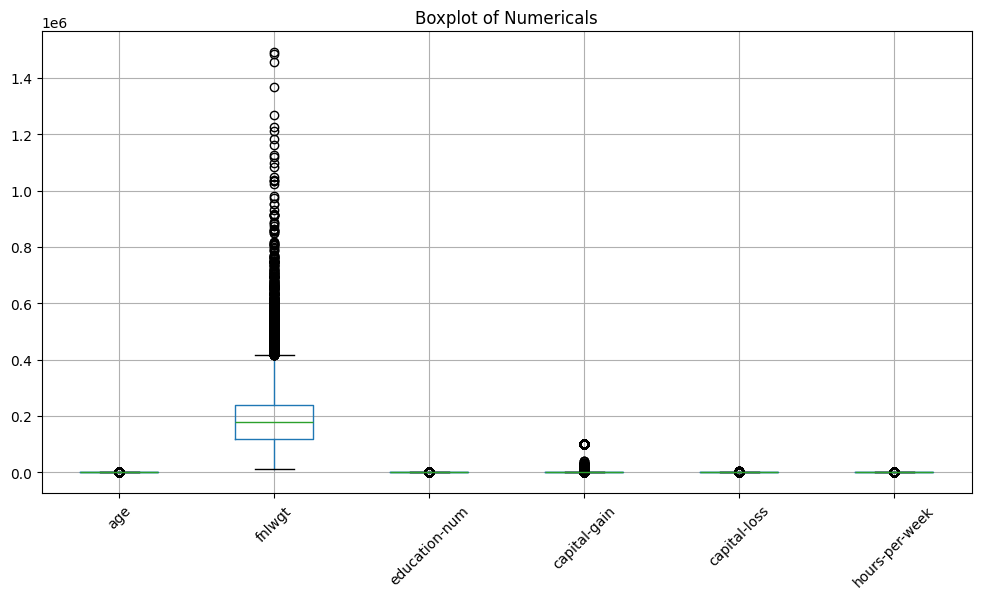

In [92]:
plt.figure(figsize=(12,6))
adult_data[numerical].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numericals")
plt.show()

it looks like fnlwgt is skewed compared to the rest of the data, so lets transform it using log()

In [93]:
adult_data["fnlwgt_log"] = np.log1p(adult_data["fnlwgt"])
print(adult_data[["fnlwgt", "fnlwgt_log"]].describe())

             fnlwgt    fnlwgt_log
count  4.884200e+04  48842.000000
mean   1.896641e+05     11.982958
std    1.056040e+05      0.630817
min    1.228500e+04      9.416216
25%    1.175505e+05     11.674632
50%    1.781445e+05     12.090356
75%    2.376420e+05     12.378525
max    1.490400e+06     14.214556


now lets just compare the two features after transforming 

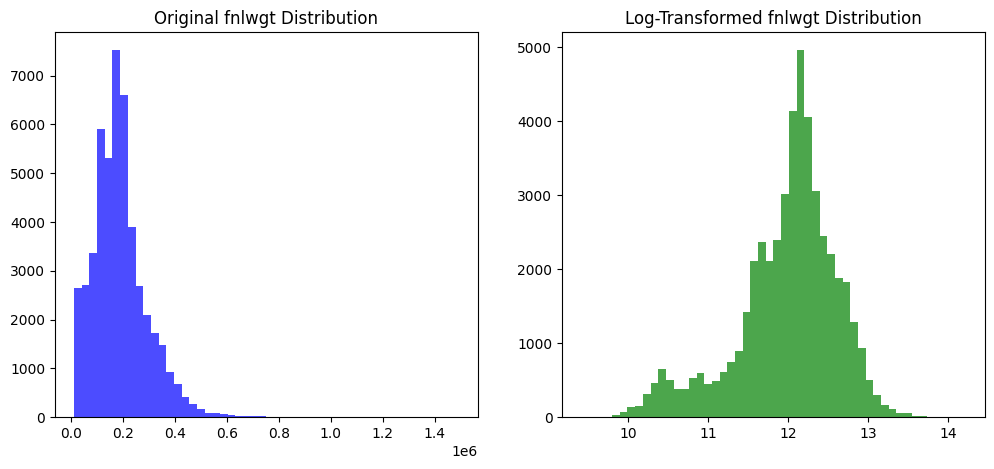

In [94]:
#plotting the original fnlwgt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(adult_data["fnlwgt"], bins=50, color="blue", alpha=0.7)
plt.title("Original fnlwgt Distribution")

#plotting the log-transformed fnlwgt
plt.subplot(1,2,2)
plt.hist(adult_data["fnlwgt_log"], bins=50, color="green", alpha=0.7)
plt.title("Log-Transformed fnlwgt Distribution")

plt.show()

now that this has been normalized, lets move on. 

after transforming and normalizing the fnlwgt i just want to have a quick look at the other numerical features to ensure i havent missed anything 

In [95]:
numerical = ['age', 'fnlwgt_log', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
adult_data[numerical].describe()

,age,fnlwgt_log,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,11.982958,10.078089,1079.067626,87.502314,40.422382
std,13.710510,0.630817,2.570973,7452.019058,403.004552,12.391444
min,17.000000,9.416216,1.000000,0.000000,0.000000,1.000000
25%,28.000000,11.674632,9.000000,0.000000,0.000000,40.000000
50%,37.000000,12.090356,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.378525,12.000000,0.000000,0.000000,45.000000
max,90.000000,14.214556,16.000000,99999.000000,4356.000000,99.000000


looking at this, it seems to me like i do not need to do any removal of outliers. so lets go on with modeling the data.  

i want to plot the features into histograms based on count

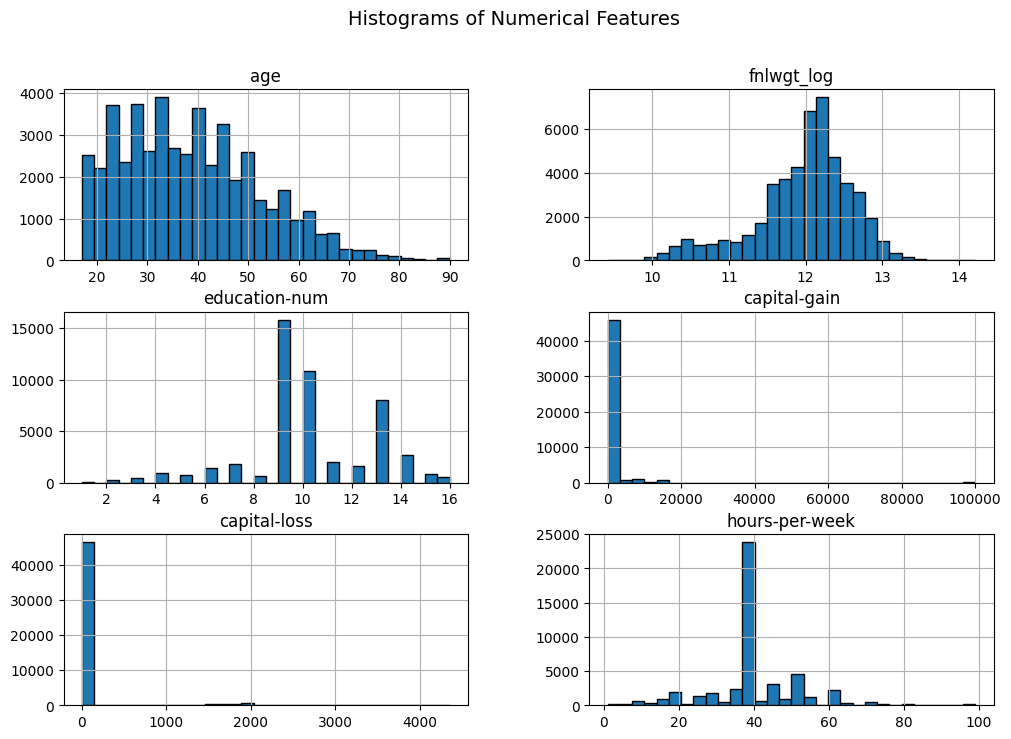

In [96]:

adult_data[numerical].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

looking at this i can see there are a lot of 0 values in both capital gain and loss, so i would like to convert them into binary values 

In [97]:
adult_data["capital-gain-binary"] = (adult_data["capital-gain"] > 0).astype(int)
adult_data["capital-loss-binary"] = (adult_data["capital-loss"] > 0).astype(int)

print(adult_data[["capital-gain-binary", "capital-loss-binary"]].value_counts())


capital-gain-binary  capital-loss-binary
0                    0                      42525
1                    0                       4035
0                    1                       2282
Name: count, dtype: int64


now that i have cleaned and transformed the data, i will create a copy of the original dataset and drop the values we dont need 

In [98]:
adult_data_cleaned = adult_data.copy()

adult_data_cleaned.drop(columns=["capital-gain", "capital-loss", "fnlwgt"], inplace=True)

adult_data_cleaned.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  48842 non-null  int64  
 1   workclass            46043 non-null  object 
 2   education            48842 non-null  object 
 3   education-num        48842 non-null  int64  
 4   marital-status       48842 non-null  object 
 5   occupation           46033 non-null  object 
 6   relationship         48842 non-null  object 
 7   race                 48842 non-null  object 
 8   sex                  48842 non-null  object 
 9   hours-per-week       48842 non-null  int64  
 10  native-country       47985 non-null  object 
 11  income               48842 non-null  object 
 12  fnlwgt_log           48842 non-null  float64
 13  capital-gain-binary  48842 non-null  int64  
 14  capital-loss-binary  48842 non-null  int64  
dtypes: float64(1), int64(5), object(9)
m

since the income bracket is a categorical feature lets have a look at what categories there are 

In [99]:
print(adult_data_cleaned["income"].unique())

['<=50K' '>50K' '<=50K.' '>50K.']


as we can see here, there are 4 types of values where there only should be two, lets remove the trailing period so we only have two types 

In [100]:
adult_data_cleaned["income"] = adult_data_cleaned["income"].str.strip().str.replace(r"\.$", "", regex=True)
print(adult_data_cleaned["income"].unique())

['<=50K' '>50K']


okay now that we have cleaned the dataset with only features we need, lets model some correlations between, the numerical values and categorical values 

first i would like to see the relationships between the numerical features, so i will start with plotting a correlation matrix

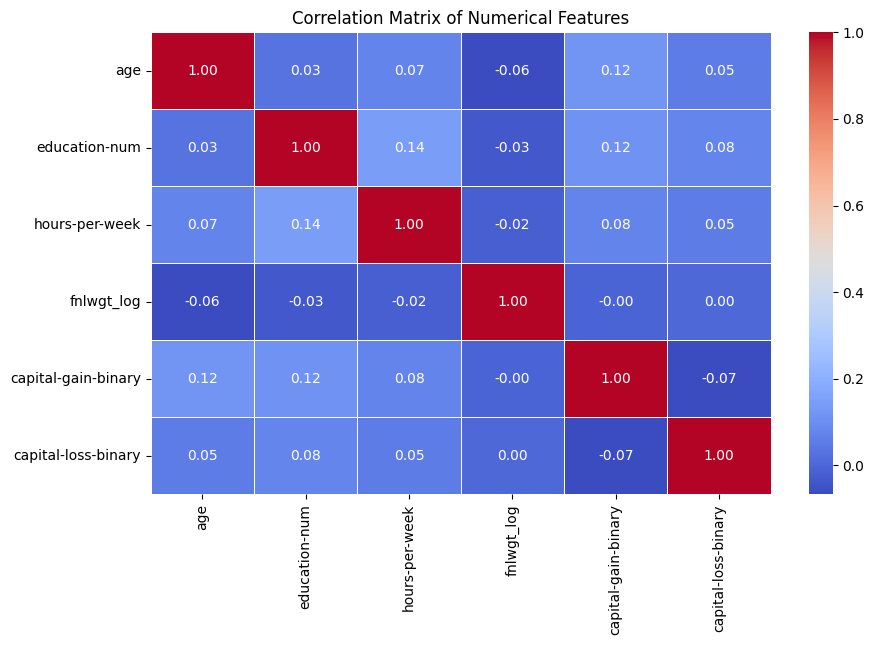

In [101]:
numerical = adult_data_cleaned.select_dtypes(include=["int64", "float64"]).columns

correlation_matrix = adult_data_cleaned[numerical].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Now lets compare the hours worked per week, as well as age groups with the income categories. 

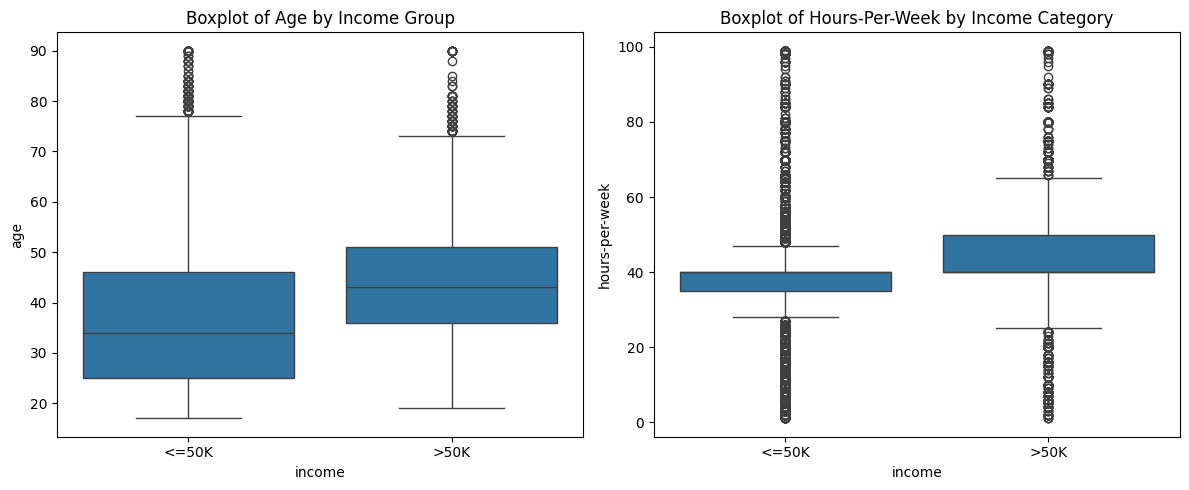

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=adult_data_cleaned, x="income", y="age", ax=axes[0])
axes[0].set_title("Boxplot of Age by Income Group")

sns.boxplot(data=adult_data_cleaned, x="income", y="hours-per-week", ax=axes[1])
axes[1].set_title("Boxplot of Hours-Per-Week by Income Category")

plt.tight_layout()
plt.show()


lets see the income distribution by education level 

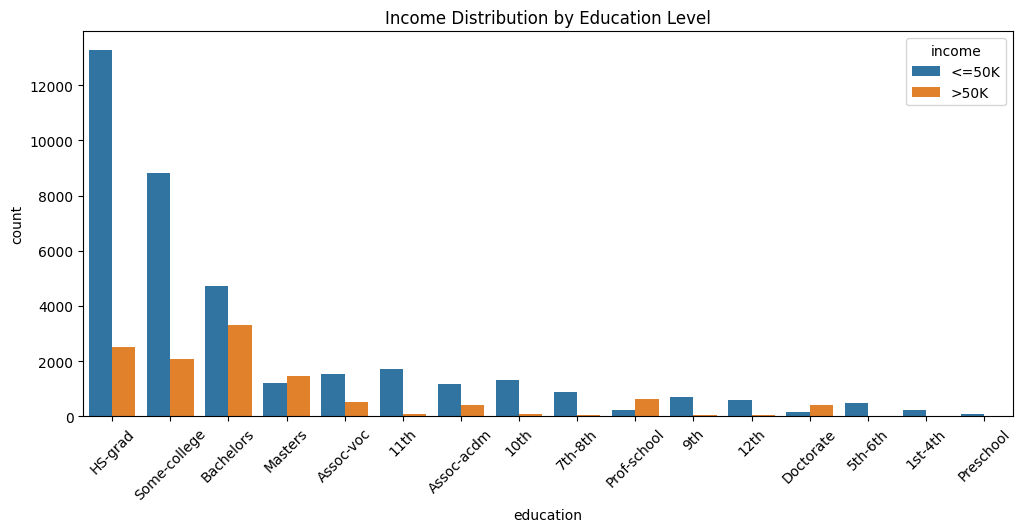

In [103]:
plt.figure(figsize=(12, 5))
sns.countplot(data=adult_data_cleaned, x="education", hue="income", order=adult_data_cleaned["education"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.show()

i also want to see how capital loss and gain, compares to income, using frequency distribution and plotting it into a stacket bar chart 

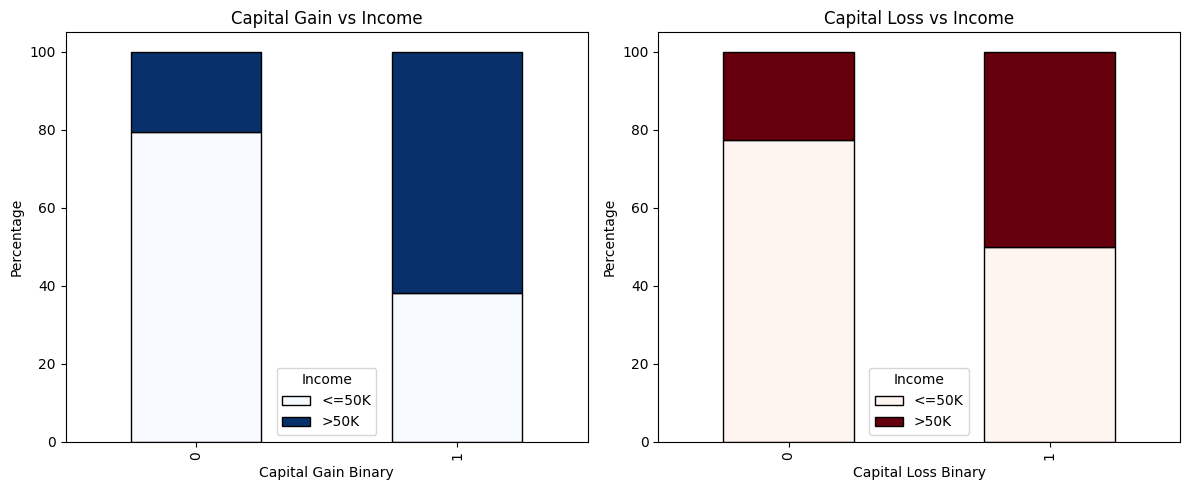

In [ ]:
capital_gain_table = pd.crosstab(adult_data_cleaned["capital-gain-binary"], adult_data_cleaned["income"], normalize="index") * 100
capital_loss_table = pd.crosstab(adult_data_cleaned["capital-loss-binary"], adult_data_cleaned["income"], normalize="index") * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

capital_gain_table.plot(kind="bar", stacked=True, ax=axes[0], colormap = "Blues", edgecolor="black")
axes[0].set_title("Capital Gain vs Income")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Capital Gain Binary")
axes[0].legend(title="Income")

capital_loss_table.plot(kind="bar", stacked=True, ax=axes[1], colormap = "Reds", edgecolor="black" )
axes[1].set_title("Capital Loss vs Income")
axes[1].set_ylabel("Percentage")
axes[1].set_xlabel("Capital Loss Binary")
axes[1].legend(title="Income")


plt.tight_layout()
plt.show()

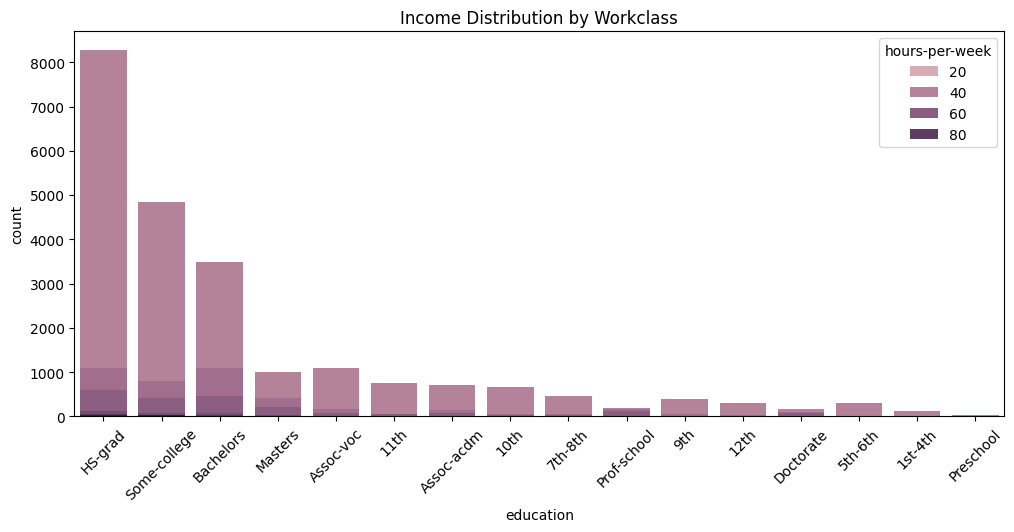

In [115]:
plt.figure(figsize=(12, 5))
sns.countplot(data=adult_data_cleaned, x="education", hue="hours-per-week", order=adult_data_cleaned["education"].value_counts().index, dodge=False)
plt.xticks(rotation=45)
plt.title("Income Distribution by Workclass")
plt.show()